# Header Inspector

There's a number of pieces of information I need to get from the headers. I'll put the questions here and answer them as I go.

1. How many pointings are there?
    There are 4 pointings
1. What is each pointing for?
    2 are for Tr14, the other two are for reference?
1. How many exposures were taken at each pointing?
    27, 27, 57, 71
1. How many exposures were taken with each filter, at each pointing?
    F127M: 9, 9, 19, 24
    F139M: 18, 18, 38, 47
1. How many exposures were taken with each filter total?

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [17]:
from astropy.coordinates import SkyCoord

In [1]:
from utils import header_utils

In [37]:
prihdrs = header_utils.load_headers('pri')

In [61]:
for col in pri_headers.columns:
    print(col)
targs = SkyCoord(prihdrs["ra_targ"],prihdrs["dec_targ"], unit='deg')

simple
bitpix
naxis
extend
origin
date
nextend
filename
filetype
telescop
instrume
equinox
rootname
imagetyp
primesi
targname
ra_targ
dec_targ
proposid
linenum
pr_inv_l
pr_inv_f
pr_inv_m
sunangle
moonangl
sun_alt
fgslock
gyromode
refframe
mtflag
date-obs
time-obs
expstart
expend
exptime
expflag
qualcom1
qualcom2
qualcom3
quality
pa_v3
postarg1
postarg2
opus_ver
csys_ver
cal_ver
proctime
obstype
obsmode
sclamp
nrptexp
subarray
subtype
detector
filter
samp_seq
nsamp
sampzero
aperture
propaper
dirimage
saa_exit
saa_time
saa_dark
saacrmap
scan_typ
scan_wid
ang_side
dwell_ln
dwell_tm
scan_ang
scan_rat
no_lines
scan_len
scan_cor
csmid
dqicorr
zsigcorr
zoffcorr
darkcorr
blevcorr
nlincorr
flatcorr
crcorr
unitcorr
photcorr
rptcorr
drizcorr
bpixtab
ccdtab
oscntab
crrejtab
darkfile
nlinfile
pfltfile
dfltfile
lfltfile
graphtab
comptab
imphttab
dgeofile
mdriztab
meanexp
scalense
initgues
skysub
skysum
crsigmas
crradius
crthresh
badinpdq
rej_rate
crmask
photmode
photflam
photfnu
photzpt
photplam
pho

In [64]:
prihdrs['subtype'].unique()

array(['SQ64SUB', 'SQ256SUB', 'FULLIMAG'], dtype=object)

Text(0, 0.5, 'Dec [deg]')

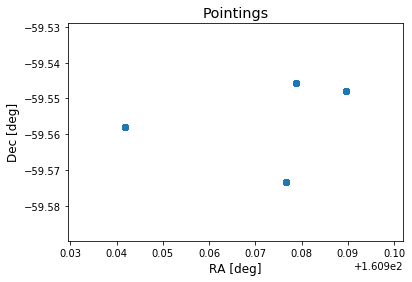

In [59]:
fig, ax = plt.subplots(1, 1)
ax.scatter(targs.ra, targs.dec)
ax.set_title("Pointings")
ax.set_xlabel("RA [deg]")
ax.set_ylabel("Dec [deg]")
# some of these are the subarrays

In [29]:
import seaborn as sns

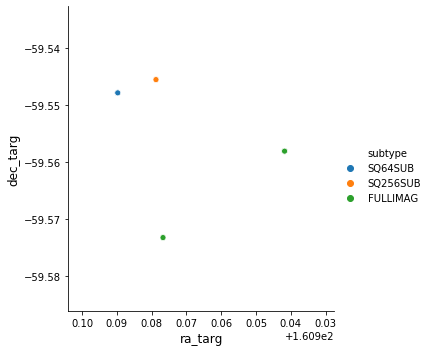

In [68]:
g = sns.relplot(data=prihdrs, x='ra_targ', y='dec_targ',
            hue='subtype')
g.ax.invert_xaxis()

In [38]:
for col in prihdrs.columns:
    print(col)

simple
bitpix
naxis
extend
origin
date
nextend
filename
filetype
telescop
instrume
equinox
rootname
imagetyp
primesi
targname
ra_targ
dec_targ
proposid
linenum
pr_inv_l
pr_inv_f
pr_inv_m
sunangle
moonangl
sun_alt
fgslock
gyromode
refframe
mtflag
date-obs
time-obs
expstart
expend
exptime
expflag
qualcom1
qualcom2
qualcom3
quality
pa_v3
postarg1
postarg2
opus_ver
csys_ver
cal_ver
proctime
obstype
obsmode
sclamp
nrptexp
subarray
subtype
detector
filter
samp_seq
nsamp
sampzero
aperture
propaper
dirimage
saa_exit
saa_time
saa_dark
saacrmap
scan_typ
scan_wid
ang_side
dwell_ln
dwell_tm
scan_ang
scan_rat
no_lines
scan_len
scan_cor
csmid
dqicorr
zsigcorr
zoffcorr
darkcorr
blevcorr
nlincorr
flatcorr
crcorr
unitcorr
photcorr
rptcorr
drizcorr
bpixtab
ccdtab
oscntab
crrejtab
darkfile
nlinfile
pfltfile
dfltfile
lfltfile
graphtab
comptab
imphttab
dgeofile
mdriztab
meanexp
scalense
initgues
skysub
skysum
crsigmas
crradius
crthresh
badinpdq
rej_rate
crmask
photmode
photflam
photfnu
photzpt
photplam
pho

In [50]:
prihdrs['filter'];

In [85]:
prihdrs.groupby(['proposid', 'filter', 'ra_targ', 'subtype'])['filename'].count()

proposid  filter  ra_targ     subtype 
13446     F127M   160.941791  FULLIMAG     9
                  160.976721  FULLIMAG     9
                  160.978742  SQ256SUB    24
                  160.989726  SQ64SUB     19
          F139M   160.941791  FULLIMAG     9
                  160.976721  FULLIMAG     9
                  160.978742  SQ256SUB    24
                  160.989726  SQ64SUB     19
13848     F139M   160.941791  FULLIMAG     9
                  160.976721  FULLIMAG     9
                  160.978742  SQ256SUB    23
                  160.989726  SQ64SUB     19
Name: filename, dtype: int64

In [88]:
prihdrs.groupby(['proposid', 'filter', 'ra_targ', 'subtype'])['exptime'].sum()

proposid  filter  ra_targ     subtype 
13446     F127M   160.941791  FULLIMAG    443.072025
                  160.976721  FULLIMAG    443.072025
                  160.978742  SQ256SUB     66.675600
                  160.989726  SQ64SUB      16.165884
          F139M   160.941791  FULLIMAG    443.072025
                  160.976721  FULLIMAG    443.072025
                  160.978742  SQ256SUB     66.675600
                  160.989726  SQ64SUB      16.165884
13848     F139M   160.941791  FULLIMAG    443.072025
                  160.976721  FULLIMAG    443.072025
                  160.978742  SQ256SUB     63.897450
                  160.989726  SQ64SUB      16.165884
Name: exptime, dtype: float64

In [92]:
(67*3+16*3)/60

4.15

In [53]:
prihdrs['proposid'].unique()

array([13446, 13848])

In [75]:
prihdrs['exptime'].sum()/60

48.4029742

In [77]:
len(prihdrs)

182

In [78]:
2 * 2 * 18 + 43*2

158

In [93]:
prihdrs["date-obs"].unique()

array(['2013-10-22', '2015-10-14', '2013-10-23'], dtype=object)